<a href="https://colab.research.google.com/github/Alejandro-RL/Atividade_2.2/blob/main/Parte%202/PP2_2_2_Proposic%CC%A7a%CC%83o_e_Avaliac%CC%A7a%CC%83o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Adan Thierry Souza dos Santos - 1915080050
* Alejandro da Rocha Loureiro - 1915080001
* Fernando Araújo Alves Filho - 1915080063
* Victor Brasil de Pina - 1915080079


## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

### Import

In [1]:
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,f1_score,precision_score,recall_score

### Dataset

In [ ]:
!wget https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv

## Questão 1

In [3]:
#1
df = pd.read_csv('/content/covtype.csv')

##Questão 2 e 3
### Definindo atributos preditores e atributo alvo

In [4]:
#2 e 3
X = df[df.columns[0:10]]
y = df[df.columns[-1]]

## Questão 4
### Train/Test Split 
70/30

In [5]:
#4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=42, shuffle=True)

## Questão 5
### Padronização

In [6]:
#5
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [7]:
X_train_std

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
110220,-1.213285,1.521970,-1.215756,-0.985653,-0.709902,-0.962484,-0.229567,0.541278,0.614032,-0.199579
363425,0.666947,-0.684312,-0.413945,-0.444373,0.182714,-0.831053,0.817019,-0.166989,-0.667745,-0.668463
111410,0.178158,1.039625,-0.280310,1.447756,-0.229263,2.016207,-0.864994,0.996592,1.346476,-0.496589
552313,-0.289224,0.512618,1.590582,-0.952706,-0.194931,0.389659,-0.939750,1.502497,1.241841,-0.500358
107881,0.745438,-1.068401,-1.082121,-0.364357,-0.349423,0.473647,0.293726,0.136554,-0.013777,1.807877
...,...,...,...,...,...,...,...,...,...,...
110268,0.795388,-0.764703,-0.146675,0.435797,-0.109103,0.411458,0.817019,-0.470532,-0.877015,1.774708
259178,0.759710,0.003476,1.991488,2.102000,4.199487,-0.766940,0.929153,0.237735,-1.164761,0.644713
365838,0.691921,1.173609,0.387866,0.308713,-0.091937,-0.674617,-1.537799,0.693049,1.634222,0.047678
131932,0.377955,1.718481,0.922406,-0.684419,-0.469582,1.522537,-1.313531,-1.077617,0.430921,-1.023518


### Modelo

In [8]:
#5
rede = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=True)
rede.fit(X_train_std,y_train)

Iteration 1, loss = 0.97796298
Iteration 2, loss = 0.71103124
Iteration 3, loss = 0.69041675
Iteration 4, loss = 0.68291265
Iteration 5, loss = 0.67751866
Iteration 6, loss = 0.67271831
Iteration 7, loss = 0.66981802
Iteration 8, loss = 0.66792920
Iteration 9, loss = 0.66644756
Iteration 10, loss = 0.66540990
Iteration 11, loss = 0.66450811
Iteration 12, loss = 0.66349983
Iteration 13, loss = 0.66291347
Iteration 14, loss = 0.66218223
Iteration 15, loss = 0.66168144
Iteration 16, loss = 0.66094735
Iteration 17, loss = 0.66021539
Iteration 18, loss = 0.65945762
Iteration 19, loss = 0.65873748
Iteration 20, loss = 0.65792527
Iteration 21, loss = 0.65703754
Iteration 22, loss = 0.65615734
Iteration 23, loss = 0.65484772
Iteration 24, loss = 0.65334666
Iteration 25, loss = 0.65200478
Iteration 26, loss = 0.65094428
Iteration 27, loss = 0.64999758
Iteration 28, loss = 0.64925113
Iteration 29, loss = 0.64858599
Iteration 30, loss = 0.64809011
Iteration 31, loss = 0.64763879
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, max_iter=300, verbose=True)

## Questão 6 - Validação da questão 5

In [9]:
## Essa função vai ser reutilizada posteriormente
def validation(rede, X_test_std,y_test, p = True):
  y_pred = rede.predict(X_test_std)
  cmatrix = confusion_matrix(y_test,y_pred)
  
  #6.2 Acurácia
  acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)
  

  #6.4 Precisão
  pre = precision_score(y_test,y_pred,average='weighted')
  

  #6.5 Revocação 
  rev = recall_score(y_test,y_pred,average='weighted')
  

  #6.3 F-Score
  f1 = f1_score(y_test,y_pred,average='weighted')
  

  if (p):
    print("Matriz de confusão:\n")
    print(cmatrix)
    print("\nAcurácia: ",acc)
    print("\nPrecisão: ",pre)
    print("\nRevocação: ",rev)
    print("\nF-Score: ",f1)
  return cmatrix, acc, pre, rev, f1

In [10]:
validation(rede,X_test_std, y_test)
!

Matriz de confusão:

[[45939 16531     4     0    14    14  1054]
 [16182 67089   913     0   136   645   113]
 [    0  1865  7288   135     0  1350     0]
 [    0     4   298   368     0   125     0]
 [    3  2596    34     0   294    14     0]
 [    0  1457  1932    59     0  1779     0]
 [ 2697    35     0     0     0     0  3337]]

Acurácia:  0.5213588620616247

Precisão:  0.7200064857221942

Revocação:  0.7234142647328805

F-Score:  0.7171272774056595


## Questão 7- Repetir a mesma rede anterior 15x

### Train/Test split

In [12]:
resultados = []
for x in range(15):
  #7 e 7.1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,train_size= 0.7, shuffle=True)
  
  ## Padronização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  
  ### Modelo
  rede1 = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=False)
  rede1.fit(X_train_std,y_train)

  resultados.append(validation(rede1, X_test_std, y_test, p = False))


In [13]:
for resultado in resultados:
  print(resultado)

(array([[45145, 17029,     2,     0,     0,    37,  1116],
       [15957, 67294,  1122,     1,   152,   642,   116],
       [    0,  1839,  7981,   135,     0,   666,     0],
       [    0,     4,   373,   397,     0,    59,     0],
       [   12,  2539,    38,     0,   303,    15,     0],
       [    0,  1458,  2647,    73,     3,   989,     0],
       [ 2973,    15,     0,     0,     0,     0,  3172]]), 0.5057729915761909, 0.7128419915801023, 0.71875, 0.7100593959704395)
(array([[45713, 17173,     9,     0,    19,    13,   824],
       [15071, 68130,   992,     0,    79,   488,    16],
       [    0,  1772,  8041,   122,     0,   873,     0],
       [    0,     8,   499,   149,     0,   153,     0],
       [   21,  2519,    30,     0,   226,     3,     0],
       [    0,  1511,  2660,    23,     0,  1015,     0],
       [ 3402,    29,     0,     0,     0,     0,  2721]]), 0.45239428298867707, 0.7171712043810636, 0.7228462915366257, 0.7125093977825597)
(array([[44685, 18038,    16,   

### 7.2 Média e Desvio Padrão  da acurácia e F-score

#### Media

In [14]:
soma_acc = 0
soma_f1score = 0
for resultado in resultados:
  soma_acc+= resultado[1]
  soma_f1score+= resultado[4]
media_acc = soma_acc/len(resultados)
media_f1 = soma_f1score/len(resultados)
print(f"medias:\nAcurácia: {media_acc}\nf1 score:{media_f1}")

medias:
Acurácia: 0.4854553120620771
f1 score:0.7103624725872392


#### Desvio padrão

In [15]:
somatorio_acc = 0
somatorio_f1 = 0
for resultado in resultados:
  somatorio_acc += (resultado[1] - media_acc)**(2)
  somatorio_f1 += (resultado[4] - media_f1)**(2)

dp_acc = (somatorio_acc/len(resultado))**(1/2)
dp_f1 = (somatorio_f1/len(resultado))**(1/2)
print(f"desvio padrao:\nAcurácia: {dp_acc}\nf1 score:{dp_f1}")

desvio padrao:
Acurácia: 0.025307368083555378
f1 score:0.005186644257616843


## Questão 8 - utilizando otimizador SGD

In [17]:
resultados = []
for x in range(15):
  #7 e 7.1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,train_size= 0.7, shuffle=True)
  
  ## Padronização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  
  ### Modelo
  rede1 = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=False, solver = 'sgd')
  rede1.fit(X_train_std,y_train)

  resultados.append(validation(rede1, X_test_std, y_test, p = False))



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
for resultado in resultados:
  print(resultado)

(array([[44466, 17866,     4,     0,     2,    15,   966],
       [15040, 68560,  1053,     0,     2,   440,    48],
       [    0,  1873,  7998,    87,     0,   685,     0],
       [    0,     5,   522,   159,     0,   141,     0],
       [   13,  2727,    32,     0,    10,     7,     0],
       [    0,  1404,  2727,    20,     0,  1111,     0],
       [ 2851,    35,     0,     0,     0,     0,  3435]]), 0.4584824120929292, 0.7169897105486605, 0.7213775931705526, 0.7100293554934484)
(array([[45247, 17057,    49,     0,     5,     7,  1221],
       [16053, 67542,   922,     0,    16,   334,    22],
       [    0,  2130,  7415,   102,     0,  1089,     0],
       [    0,     5,   462,   121,     0,   241,     0],
       [   24,  2727,    37,     0,   106,     1,     0],
       [    0,  1602,  2210,    19,     0,  1285,     0],
       [ 3381,    29,     0,     0,     0,     0,  2843]]), 0.4409019365666956, 0.7113263890718984, 0.7146078116394345, 0.7043132410087092)
(array([[44683, 17314,

In [19]:
soma_acc = 0
soma_f1score = 0
for resultado in resultados:
  soma_acc+= resultado[1]
  soma_f1score+= resultado[4]
media_acc = soma_acc/len(resultados)
media_f1 = soma_f1score/len(resultados)
print(f"medias:\nAcurácia: {media_acc}\nf1 score:{media_f1}")



somatorio_acc = 0
somatorio_f1 = 0

for resultado in resultados:
  somatorio_acc += (resultado[1] - media_acc)**(2)
  somatorio_f1 += (resultado[4] - media_f1)**(2)

dp_acc = (somatorio_acc/len(resultado))**(1/2)
dp_f1 = (somatorio_f1/len(resultado))**(1/2)
print(f"desvio padrao:\nAcurácia: {dp_acc}\nf1 score:{dp_f1}")

medias:
Acurácia: 0.4491165932418355
f1 score:0.7037591947122093
desvio padrao:
Acurácia: 0.02000329373849373
f1 score:0.006134927870607552


<h1>Houve influência da escolha do otimizador no desempenho da rede?

R: Os resultados de acurácia foram semelhantes, mas o F1-Score do solver Adam foi maior que o do solver SGD. Quanto ao desvio-padrão, houve pouca variação entre as redes.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
#1
#Uma ou duas camadas ocultas
#solver Adam ou SGD
# épocas: 100, 150 ou 200
redes = [[] for i in range(10)]
redes[0] = MLPClassifier(hidden_layer_sizes=(10),activation='tanh',max_iter=100,solver="adam")
redes[1] = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=150,solver="sgd")
redes[2] = MLPClassifier(hidden_layer_sizes=(10),activation='logistic',max_iter=200,solver="adam")
redes[3] = MLPClassifier(hidden_layer_sizes=(10,15),activation='identity',max_iter=100,solver="adam")
redes[4] = MLPClassifier(hidden_layer_sizes=(10,15),activation='relu',max_iter=150,solver="adam")
redes[5] = MLPClassifier(hidden_layer_sizes=(10,15),activation='tanh',max_iter=200,solver="adam")
redes[6] = MLPClassifier(hidden_layer_sizes=(20),activation='relu',max_iter=100,solver="adam")
redes[7] = MLPClassifier(hidden_layer_sizes=(20),activation='logistic',max_iter=150,solver="adam")
redes[8] = MLPClassifier(hidden_layer_sizes=(20),activation='identity',max_iter=200,solver="adam")
redes[9] = MLPClassifier(hidden_layer_sizes=(30,40),activation='logistic',max_iter=200,solver="adam")

In [ ]:
#2 Avaliar cada rede 15 vezes

#métricas
matriz_c = [[] for i in range(len(redes))]
acc = [[] for i in range(len(redes))]
pre = [[] for i in range(len(redes))]
rev = [[] for i in range(len(redes))]
f1 = [[] for i in range(len(redes))]

for i in range(15):
  #Inicialização
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True)

  #Normalização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  for j in range(len(redes)):
    redes[j].fit(X_train_std,y_train)
    a,b,c,d,e = validation(redes[j], X_test_std,y_test, p = False)

    
    matriz_c[j].append(a)
    acc[j].append(b)
    pre[j].append(c)
    rev[j].append(d)
    f1[j].append(e)





In [ ]:
#3
#3.1 Top-3 melhores redes no tocante à F-Score e Acurácia

#Usando a média para descobrir a melhor rede
acc_m =[[] for i in range(len(acc))]
f1_m =[[] for i in range(len(f1))]
resultado = [[] for i in range(len(f1))]
indices = [i for i in range(len(f1))]
#Média das Acurácias
for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += acc[i][j]

  acc_m[i] = (aux/(j+1))

#Média dos F_Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += f1[i][j]

  f1_m[i] = (aux/(j+1))


# Soma dos valores
#As redes com maior soma de acurácia e f-score serão selecionadas
for i in range(len(resultado)):
  resultado[i] = acc_m[i] + f1_m[i]

resultado1 = sorted(zip(resultado,indices), reverse=True)[:3]
print("Melhores redes:\n")
for i in resultado1:

  print("Rede de índice: ",i[1])
  print("Acurácia Média: ",acc_m[i[1]])
  print("F-Score Médio: ",f1_m[i[1]])
  print('')



  

In [ ]:
'''
# Propondo Novas Arquiteturas -3- Melhores Redes das 10 sugeridas.
============================================================================
Melhores redes:

Rede de índice:  9
Acurácia Média:  0.6625432510864768
F-Score Médio:  0.8036498803809674

Rede de índice:  5
Acurácia Média:  0.5381018340996561
F-Score Médio:  0.7439390815931607

Rede de índice:  4
Acurácia Média:  0.5429059643905464
F-Score Médio:  0.7346680900384723
'''

In [ ]:
#3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

#Melhor desempenho = maior valor de f-score + acurácia
desempenho = [[] for i in range(len(resultado1))]
for i in range(len(resultado1)):
  indice = resultado1[i][1]
  for j in range(len(acc[indice])):
    desempenho[i].append([acc[indice][j]+f1[indice][j],j])

desempenho1 = []

for i in range(len(desempenho)):
  desempenho1.append(max(desempenho[i]))

for i in range(len(resultado1)):
  print("\nO melhor desempenho da rede",resultado1[i][1]," foi na repetição:",desempenho1[i][1]+1)
  print("\n Matriz de Confusão: ")
  m = matriz_c[resultado1[i][1]][desempenho1[i][1]]
  print(m)


In [ ]:
'''
O melhor desempenho da rede 9  foi na repetição: 13

 Matriz de Confusão: 

[[51531 10955     3     0    72    19   937]
 [11479 71887   872     4   401   459   145]
 [    2  1220  8427    79    17   870     0]
 [    0     1   191   532     0    77     0]
 [  150  1490    39     0  1061    30     0]
 [   53   849  1492    41    14  2734     0]
 [ 1470    41     0     0     0     0  4660]]

O melhor desempenho da rede 5  foi na repetição: 6

 Matriz de Confusão: 
[[47099 15987     4     0    33    23   727]
 [13080 69654   965     4   263   772    85]
 [    0  1627  7839   251     0   935     0]
 [    0     2   242   486     0    59     0]
 [   85  2215    39     0   432    61     0]
 [    0   990  2255    82     0  1891     0]
 [ 2618    88     0     0     0     0  3411]]

O melhor desempenho da rede 4  foi na repetição: 2

 Matriz de Confusão: 
[[45989 16159    10     0    14    32  1451]
 [14187 68868   782     0   176   678   149]
 [    0  1615  7849   193     6   974     0]
 [    0     9   271   510     0    53     0]
 [   34  2220    40     0   484    38     0]
 [    0  1109  2008    72     5  2060     0]
 [ 2192    57     0     0     0     0  4010]]
'''

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

1.\
$N_i = 10$ \
$N_o = 7$

2. \
$N_{h1} = 0.5 \cdot \sqrt{10 \cdot 7} = 4 $ \
$N_{h2} = 2 \cdot \sqrt{10 \cdot 7} = 16 $ \
$N_{h3} = 3 \cdot \sqrt{10 \cdot 7} = 25 $

In [ ]:
#3
#Nh1 = 4
redes1 = [[] for i in range(30)]
redes1[0] = MLPClassifier(hidden_layer_sizes=(4),activation='tanh',max_iter=100,solver="adam")
redes1[1] = MLPClassifier(hidden_layer_sizes=(4),activation='relu',max_iter=150,solver="sgd")
redes1[2] = MLPClassifier(hidden_layer_sizes=(4),activation='logistic',max_iter=200,solver="adam")
redes1[3] = MLPClassifier(hidden_layer_sizes=(4),activation='identity',max_iter=100,solver="adam")
redes1[4] = MLPClassifier(hidden_layer_sizes=(4),activation='relu',max_iter=200,solver="adam")
redes1[5] = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',max_iter=100,solver="adam")
redes1[6] = MLPClassifier(hidden_layer_sizes=(4,4),activation='relu',max_iter=100,solver="adam")
redes1[7] = MLPClassifier(hidden_layer_sizes=(4,4),activation='logistic',max_iter=150,solver="adam")
redes1[8] = MLPClassifier(hidden_layer_sizes=(4,4),activation='identity',max_iter=200,solver="adam")
redes1[9] = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',max_iter=200,solver="adam")

In [ ]:
#Nh2 = 16
redes1[10] = MLPClassifier(hidden_layer_sizes=(16),activation='tanh',max_iter=100,solver="adam")
redes1[11] = MLPClassifier(hidden_layer_sizes=(16),activation='relu',max_iter=150,solver="sgd")
redes1[12] = MLPClassifier(hidden_layer_sizes=(16),activation='logistic',max_iter=200,solver="adam")
redes1[13] = MLPClassifier(hidden_layer_sizes=(16),activation='identity',max_iter=100,solver="adam")
redes1[14] = MLPClassifier(hidden_layer_sizes=(16),activation='relu',max_iter=200,solver="adam")
redes1[15] = MLPClassifier(hidden_layer_sizes=(16,16),activation='tanh',max_iter=100,solver="adam")
redes1[16] = MLPClassifier(hidden_layer_sizes=(16,16),activation='relu',max_iter=100,solver="adam")
redes1[17] = MLPClassifier(hidden_layer_sizes=(16,16),activation='logistic',max_iter=150,solver="adam")
redes1[18] = MLPClassifier(hidden_layer_sizes=(16,16),activation='identity',max_iter=200,solver="adam")
redes1[19] = MLPClassifier(hidden_layer_sizes=(16,16),activation='tanh',max_iter=200,solver="adam")

In [ ]:
#Nh3 = 25
redes1[20] = MLPClassifier(hidden_layer_sizes=(25),activation='tanh',max_iter=100,solver="adam")
redes1[21] = MLPClassifier(hidden_layer_sizes=(25),activation='relu',max_iter=150,solver="sgd")
redes1[22] = MLPClassifier(hidden_layer_sizes=(25),activation='logistic',max_iter=200,solver="adam")
redes1[23] = MLPClassifier(hidden_layer_sizes=(25),activation='identity',max_iter=100,solver="adam")
redes1[24] = MLPClassifier(hidden_layer_sizes=(25),activation='relu',max_iter=200,solver="adam")
redes1[25] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=100,solver="adam")
redes1[26] = MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',max_iter=100,solver="adam")
redes1[27] = MLPClassifier(hidden_layer_sizes=(25,25),activation='logistic',max_iter=150,solver="adam")
redes1[28] = MLPClassifier(hidden_layer_sizes=(25,25),activation='identity',max_iter=200,solver="adam")
redes1[29] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=200,solver="adam")

In [ ]:
#3.1
#2 Avaliar cada rede 15 vezes

#métricas
matriz_c = [[] for i in range(len(redes1))]
acc = [[] for i in range(len(redes1))]
pre = [[] for i in range(len(redes1))]
rev = [[] for i in range(len(redes1))]
f1 = [[] for i in range(len(redes1))]

for i in range(15):
  #Inicialização
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True)

  #Normalização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  for j in range(len(redes1)):
    redes1[j].fit(X_train_std,y_train)
    a,b,c,d,e = validation(redes1[j], X_test_std,y_test, p = False)

    
    matriz_c[j].append(a)
    acc[j].append(b)
    pre[j].append(c)
    rev[j].append(d)
    f1[j].append(e)


In [ ]:
#-------------------------------------------------------------------------------
#Usando a média para descobrir a melhor rede
acc_m =[[] for i in range(len(acc))]
f1_m =[[] for i in range(len(f1))]
resultado = [[] for i in range(len(f1))]
indices = [i for i in range(len(f1))]
#Média das Acurácias
for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += acc[i][j]
  acc_m[i] = (aux/(j+1))

#Média dos F_Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += f1[i][j]

  f1_m[i] = (aux/(j+1))


# Soma dos valores
#As redes com maior soma de acurácia e f-score serão selecionadas
for i in range(len(resultado)):
  resultado[i] = acc_m[i] + f1_m[i]

resultado2 = sorted(zip(resultado,indices), reverse=True)[:3]

print("Melhores redes:\n")
for i in resultado2:
  
  print("Rede de índice: ",i[1])
  print("Acurácia Média: ",acc_m[i[1]])
  print("F-Score Médio: ",f1_m[i[1]])
  print('')


In [ ]:
'''
# Estimando o número de neurônios - As 3 melhores redes das 30 propostas.
============================================================================
Melhores redes:

Rede de índice:  29
Acurácia Média:  0.6442603044172408
F-Score Médio:  0.7942627494389778

Rede de índice:  25
Acurácia Média:  0.6311301344393269
F-Score Médio:  0.7901136926854332

Rede de índice:  26
Acurácia Média:  0.6233769019863493
F-Score Médio:  0.7740351681237906
'''

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
#1
redes2 = []
for i in range(len(resultado1)):  
  redes2.append(redes[resultado1[i][1]])

for i in range(len(resultado2)):
  redes2.append(redes1[resultado2[i][1]])

#2.1
for i in range(len(redes2)):
  redes2[i].max_iter=200



In [ ]:
#2
X = df[df.columns[0:54]]
y = df[df.columns[-1]]

In [ ]:
#métricas
matriz_c = [[] for i in range(len(redes2))]
acc = [[] for i in range(len(redes2))]
pre = [[] for i in range(len(redes2))]
rev = [[] for i in range(len(redes2))]
f1 = [[] for i in range(len(redes2))]

for i in range(15):
  #Inicialização
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True)

  #Normalização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  for j in range(len(redes2)):
    redes1[j].fit(X_train_std,y_train)
    a,b,c,d,e = validation(redes1[j], X_test_std,y_test, p = False)

    
    matriz_c[j].append(a)
    acc[j].append(b)
    pre[j].append(c)
    rev[j].append(d)
    f1[j].append(e)


In [ ]:
#-------------------------------------------------------------------------------
acc_m =[[] for i in range(len(acc))]
f1_m =[[] for i in range(len(f1))]
resultado = [[] for i in range(len(f1))]
indices = [i for i in range(len(f1))]
dp_acc = [[] for i in range(len(acc))]
dp_f1 = [[] for i in range(len(f1))]
#Média das Acurácias
for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += acc[i][j]
  acc_m[i] = (aux/(j+1))

#Média dos F_Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += f1[i][j]
  
  f1_m[i] = (aux/(j+1))





In [ ]:
#DP das Acurácias

for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += (acc[i][j] - acc_m[i])**2

  dp_acc[i] = (aux/(j+1))**(1/2)


#DP dos F-Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += (f1[i][j] - f1_m[i])**2

  dp_f1[i] = (aux/(j+1))**(1/2)

    

In [ ]:
#2.2
for i in range(len(redes2)):
  print("Rede de índice: ",i)
  print("Acurácia média +- dp:")
  print(str(acc_m[i])+" +- "+str(dp_acc[i]))
  print('')
  print("F-Score médio +- dp:")
  print(str(f1_m[i])+" +- "+str(dp_f1[i]))
  print('')
  print('-------------------------------')



In [ ]:
'''
#Testando as Redes Neurais com Atributos Categóricos
============================================================================

Rede de índice:  0
Acurácia média +- dp:
0.45402085370495127 +- 0.01588016359191586

F-Score médio +- dp:
0.7174517538629049 +- 0.0045648277188429075

-------------------------------
Rede de índice:  1
Acurácia média +- dp:
0.4454839773778742 +- 0.018719906052779747

F-Score médio +- dp:
0.7104240018416076 +- 0.003543659155120881

-------------------------------
Rede de índice:  2
Acurácia média +- dp:
0.46212750484491144 +- 0.022204016349861563

F-Score médio +- dp:
0.7204291820522143 +- 0.0029847897695783458

-------------------------------
Rede de índice:  3
Acurácia média +- dp:
0.49220165823525913 +- 0.01293928560013884

F-Score médio +- dp:
0.7117626438246962 +- 0.002179195698170138

-------------------------------
Rede de índice:  4
Acurácia média +- dp:
0.4524221476735899 +- 0.022002147834087684

F-Score médio +- dp:
0.71277065524871 +- 0.005210046288133535

-------------------------------
Rede de índice:  5
Acurácia média +- dp:
0.4889289113429412 +- 0.02994399869565992

F-Score médio +- dp:
0.726083113429269 +- 0.0038835156771150404
'''

In [ ]:
#3
f1 = [[0.7167472168203611, 0.7106038954820889, 0.7213307618332057, 0.7121238579789588, 0.7225643779924362, 0.7216085411514026, 0.7104714928224948, 0.7166720585567473, 0.7161831204833692, 0.7117189321396781, 0.7151483460948174, 0.7235915444652866, 0.7203492624183914, 0.7238824558280551, 0.7187804438762796],
[0.7102461825137216, 0.7084975020098947, 0.7103300806228432, 0.7044742252345403, 0.7113533460063833, 0.7153234378804749, 0.7014941315316844, 0.7114899017522426, 0.7112787502379172, 0.7115044602195179, 0.7094581955459016, 0.712431028814141, 0.7158850272993946, 0.7129184039153826, 0.7096753540400724],
[0.7201058172302525, 0.7163550952775659, 0.7189625867497331, 0.7190229837159173, 0.7247051257636145, 0.7163259069517719, 0.7226949059144653, 0.7223721429899547, 0.7179783676338817, 0.7220058457427215, 0.7165083423188703, 0.7225263269044078, 0.717900990539976, 0.7252590435931634, 0.7237142494569163],
[0.7105975018663372, 0.7133618930432719, 0.7136625036034405, 0.7128178652469069, 0.7099148818967261, 0.7116583584052402, 0.7084120740919188, 0.7074164417986919, 0.7093714810095174, 0.7125629162731775, 0.7154716648862881, 0.7129542286646482, 0.7141461467033585, 0.7129618470106999, 0.7111298528702205],
[0.7042507189590957, 0.7074299017548458, 0.7162860689892173, 0.712769005918206, 0.71695435282409, 0.7064891529819586, 0.7102512386649449, 0.7110273535988264, 0.7200592359899503, 0.7174150931028902, 0.709175472872466, 0.7173781560900641, 0.721815058515522, 0.7135021441024705, 0.7067568743661011],
[0.7275093834298537, 0.7228089454559965, 0.7250773011716987, 0.7277531207324843, 0.729478189000814, 0.7327793595523842, 0.7237964151588568, 0.7255586591150975, 0.7221078334133759, 0.7205801520396012, 0.7205131920381441, 0.7273619269646195, 0.726964875930416, 0.7247237748844874, 0.7342335725512044]
]

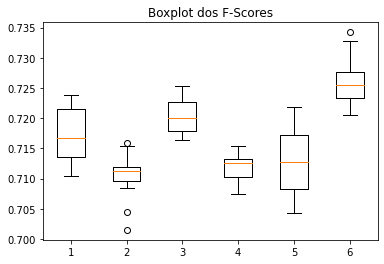

In [ ]:
#3
fig, ax  = plt.subplots()
ax.set_title("Boxplot dos F-Scores")
ax.boxplot(f1[:])
!

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

<h1>Respostas:</h1>


1. A melhor rede foi:

```
redes[9] = MLPClassifier(hidden_layer_sizes=(30,40),activation='logistic',max_iter=200,solver="adam")
```
Acurácia Média:  0.6625432510864768\
F-Score Médio:  0.8036498803809674

2. Pirâmide Geométrica. Apesar da melhor rede ter sido proposta, o método da pirâmide geométrica gerou melhores resultados de acurácia e F-Score no geral.

3. Não. As medidas de acurácia cairam drasticamente quando os atributos categóricos foram introduzidos.

4. Em geral, treinar as redes por épocas maiores trouxe melhorias. Por causa da tolerância, mesmo colocando um número alto de épocas, o treinamento para quando o erro-médio não possui uma mudança significativa, o que significa que treinar por épocas maiores trás menos riscos.

5. No presente trabalho, tivemos duas dificuldades principais:


*   O custo computacional para treinar e validar as redes.
*   Avaliar os parâmetros de treinamento de cada rede, de maneira que as pontuações de Acurácia e F-Score melhorassem.



